# Introduction to Clustering: $k$-means

### By the end of this lecture, students will be able to:

- **Assess** what scenarios could use $k$-means

- **Articulate** the methodology used by $k$-means

- **Apply** KMeans from sklearn.cluster to a relevant dataset

- **Select** the appropriate number of clusters using $k$-means and the elbow method


## Scenario

>You work for the marketing department within a large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit Learn as our main library.
The specific documentation for k-means can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [1]:
import os
import sys
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import Alison's code for the demo clusters
from src.demo_images import *

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](../img/initialscenario.png)


## Wait - How is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership accurately.

>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

#### Method 1

![left](../img/from-left.gif)

#### Method 2

![right](../img/from-right.gif)

#### Method 3

![top](../img/from-top.gif)

#### Method 4

![bottom](../img/from-bottom.gif)

### Review Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

In common:
- Green dots starts at points
- Calculates distance
- Moves dots
- Re-measures distance
- Moves dots as needed


Differences:
- Dots start in different places and groups settle in different places

Groups:
- There are four groups

Problem with this method?
- Too variable!

### K-means algorithm, at its core, in an optimization function

![minmax](../img/minmaxdata.png)

### Reassigns groups and adjusts centroids to...
![min](../img/min.png)

### And to...
![max](../img/max.png)

**Sci-kit Learn** documentation actually has some pretty good [documentation describing the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you wish for more detail.

#### Data for the exercise

- This is a sample dataset. 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
dummy_dat = pd.read_csv("../data/xclara.txt",
                        header=0,
                        index_col=0)
dummy_dat.reset_index(inplace=True)
dummy_dat.drop('index', axis=1, inplace=True)

In [5]:
dummy_dat.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [6]:
dummy_dat.tail()

,V1,V2
2995,85.65280,-6.461061
2996,82.77088,-2.373299
2997,64.46532,-10.501360
2998,90.72282,-12.255840
2999,64.87976,-24.877310


#### EDA of variables

In [7]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


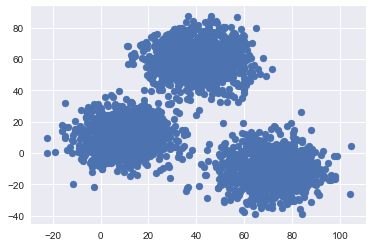

In [8]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2']);

#### Introduction of `Kmeans`

In [9]:
# fit a KMeans Model on the dummy data. Initialize with n_clusters = 3
model = None

Notice the `init` and `n_init` parameters!

In [11]:
# Inspect the cluster centers attribute

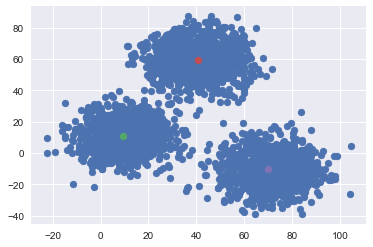

In [13]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'])
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0],
                model.cluster_centers_[i][1]);

In [14]:
# Use the predict method on a list of 2 x and y values


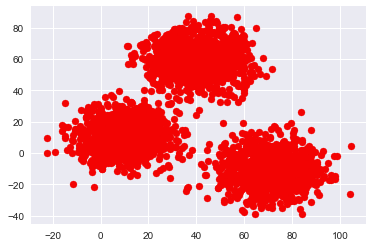

In [16]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'],
           c='#f30303');

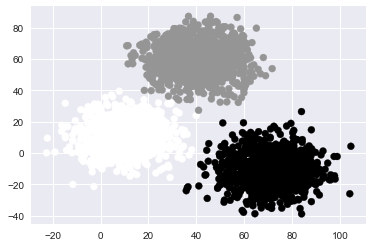

In [17]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'],
           c= model.labels_);

In [18]:
labeled_df = pd.concat([dummy_dat, pd.DataFrame(model.labels_,
                        columns=['cluster'])], axis=1)

In [19]:
labeled_df.head()

,V1,V2,cluster
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


## **Part 2**: Cluster Validation: Choosing the appropriate number of $k$

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

Elbow method uses the sum of squared error calculated from each instance of $k$ to find the best value of $k$.

This is sometimes called the "inertia" of the model, and fitted sklearn $k$-means models have an `inertia_` attribute.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

Fewer clusters seems better, but inertia will always decrease with _more_ clusters. Hence the idea of looking for an elbow in the plot of inertia vs. $k$.

In [88]:
model.inertia_

611605.880693389

Inertia is the sum of squared distances between points and their cluster center.

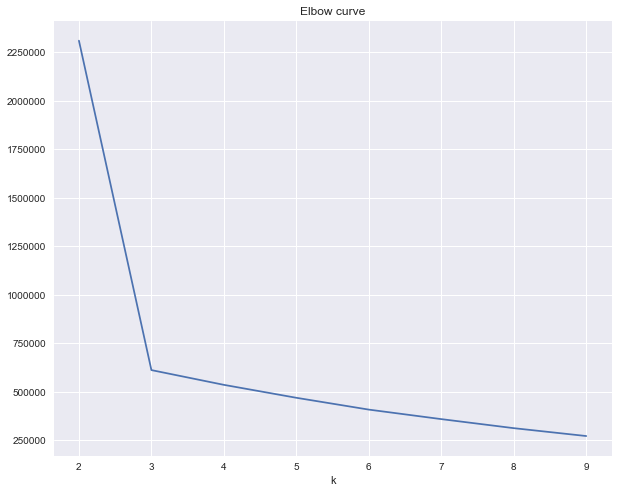

In [89]:
# Specifying the dataset and initializing variables
X = dummy_dat
distortions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot values of SSE
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Elbow curve')
ax.set_xlabel('k')
ax.plot(range(2, 10), distortions)
ax.grid(True)

### **Part 2B**: Silhouette Coefficient

![silo](../img/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.

> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

The Silhouette Coefficient ranges between -1 and 1. The closer to 1, the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.





In [90]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

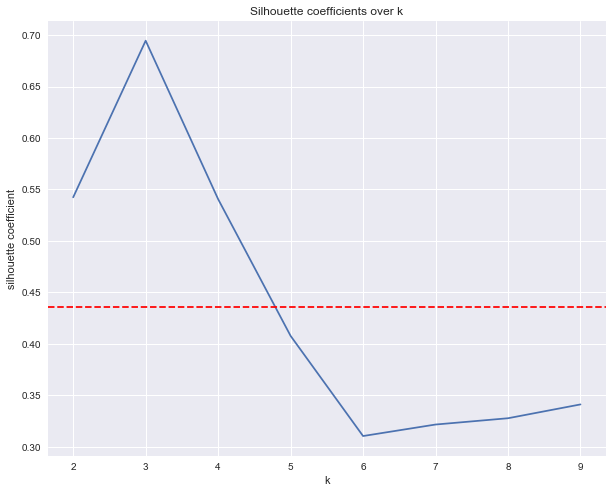

In [91]:
# Plot Silhouette coefficient
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Silhouette coefficients over k')
ax.set_xlabel('k')
ax.set_ylabel('silhouette coefficient')
ax.plot(range(2, 10), silhouette_plot)
ax.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
ax.grid(True)

# Activity

Let's practice k-means clustering with an image of a piece of art. 

In [161]:
# Our new clustering class
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
# Allows us to visualize images through matplotlib plot methods
import matplotlib.image as mpimg

# Old favorites
import pandas as pd
import numpy as np

Let's look at a colorful Miro painting with matplotlib.

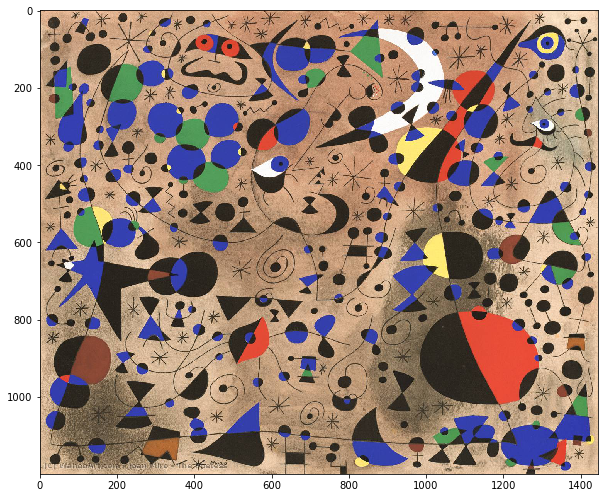

In [162]:
fig, ax = plt.subplots(figsize=(10,10))
img = mpimg.imread('./data/miro.jpg')
imgplot = ax.imshow(img)

In [ ]:
# What is the shape of the image, and what does each component represent?

In [ ]:
# Code here

In [163]:
# Let's look at one pixel


In [ ]:
# Flatten the image so that each row represents one RGB triad
img_reshape = img.reshape()

In [164]:
# Check the shape
img_reshape.shape

(1734000, 3)

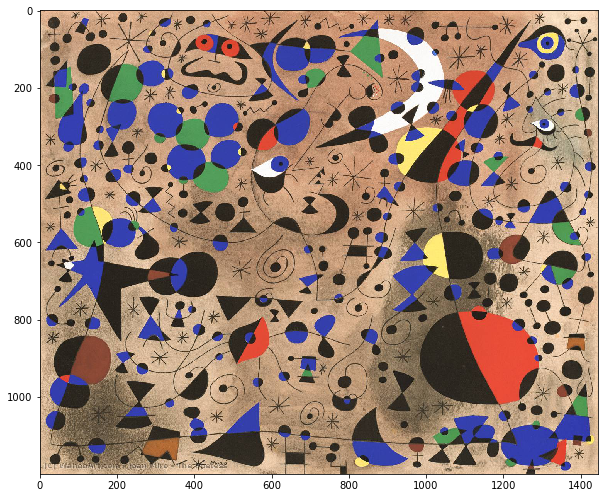

In [166]:
# after clustering, we will restore the original shape
# the code below demonstrates that the original image is restored by reshaping
# to the original dimensions 

fig, ax = plt.subplots(figsize=(10,10))
img = mpimg.imread('./data/miro.jpg')
restored_image = img_reshape.reshape(img.shape[0],img.shape[1], 3)
imgplot = ax.imshow(restored_image)



# In pairs: 10 minute exercise

Fit a KMeans instance to the reshaped data `img_reshape`.  
When initializing the object, you will start by passing `n_clusters = 2` as an argument.  
When you fit the `img_reshape`, your KMeans object will group the pixels by proximity in the 3 dimensional RGB space.  
If you pass n_clusters =2, the attribute cluster_centers_ will yield an array of floats representing 2 points in 3d space which represents the center of the group of nearest pixels. These centers are associated with 2 labels, 0 and 1. The label assignment values can be accessed via the .labels_ attribute.  
In order to visualize the groupings, we will replace the original pixel values with the cluster centers associated with the assigned label.

In [240]:
# Reminder of our flattened image
img_reshape.shape

(1734000, 3)

In [ ]:
# Instantiate a KMeans object with the argument n_clusters equal to 2
# code here
km = None

In [234]:
# Fit the km object to img_reshape
# code here

In [236]:
# view the assigned labels via the labels_ attribute
# code here

In [238]:
# view the cluster centers via the cluster_centers_ attribute
# code here

In [241]:
# create a list which stores the cluster center associated with each label in a list.  
# The list should be 1734000 elements long

label_centers = []
for label in km.labels_:
    None

In [245]:
# Convert list to array
centers_2 = np.array(label_centers)

In [246]:
# check shape is (1734000, 3)
centers_2.shape

(1734000, 3)

In [247]:
# reshape to (1200, 1445, 3)
new_image_2 = None
new_image_2.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Run the cell below to plot the new image.  It should have only 2 colors

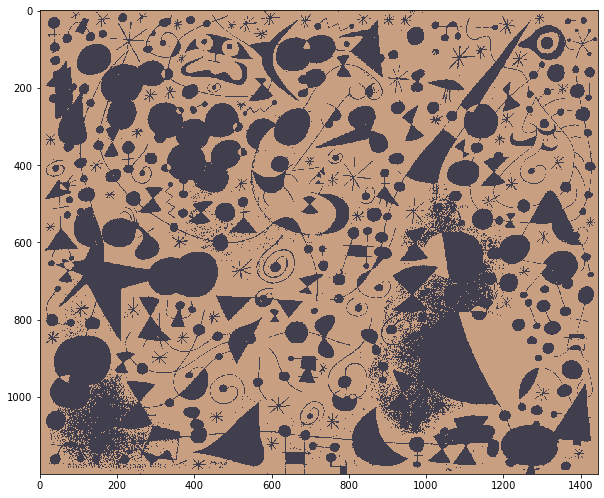

In [251]:
fig, ax = plt.subplots(figsize=(10,10))
imgplot = ax.imshow(new_image_2.astype(int))

### Explain in your own words why the image looks like it does.

Write answer here

Now, try out different numbers of clusters and see their affect on the painting.